# Máster en Big Data y Data Science

## Metodologías de gestión y diseño de proyectos big data

### AP1 - Comprensión de los Datos

#### Recolección de Datos

##### Importación de librerías y configuración del notebook

In [45]:
# Importacion de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

In [46]:
# CFG Notebook
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = None
pd.options.display.max_columns = None
plt.rc('figure',figsize=(15,8))

##### Carga y visualización de primeros registros

In [ ]:
# Carga de los datos 
df_creditos = pd.read_csv("../data/raw/datos_creditos.csv", sep=";")
df_creditos.head(2)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y
1,768805383.0,21,1000,2,5.0,PROPIA,9600,EDUCACIÓN,0.10,11.14,0,N


In [48]:
df_tarjetas = pd.read_csv("../data/raw/datos_tarjetas.csv", sep=";")
df_tarjetas.head(2)

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0
1,768805383.0,39.0,CASADO,ACTIVO,1144.0,M,12691.0,SECUNDARIO_COMPLETO,Blue,42.0,3.0


In [49]:
df_creditos.shape, df_creditos["id_cliente"].nunique()

((10127, 12), 10127)

**El dataframe de datos de créditos contiene un total de 10127 registros con 12 columnas, además, corresponden  a registros de 10127 clientes únicos**

In [50]:
# Exploración delos conjuntpos de datos
df_tarjetas.shape, df_tarjetas["id_cliente"].nunique()

((10127, 11), 10127)

**El dataframe de datos de tarjetas contiene un total de 10127 registros con 11 columnas, además, corresponden  a registros de 10127 clientes únicos**

----

#### Exploración de los datos

##### Datos Créditos

In [51]:
# Listado de columnas
list(df_creditos.columns)

['id_cliente',
 'edad',
 'importe_solicitado',
 'duracion_credito',
 'antiguedad_empleado',
 'situacion_vivienda',
 'ingresos',
 'objetivo_credito',
 'pct_ingreso',
 'tasa_interes',
 'estado_credito',
 'falta_pago']

In [52]:
# Descripción de los tipos de datos y valores no nulos
df_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  float64
 1   edad                 10127 non-null  int64  
 2   importe_solicitado   10127 non-null  int64  
 3   duracion_credito     10127 non-null  int64  
 4   antiguedad_empleado  9790 non-null   float64
 5   situacion_vivienda   10127 non-null  object 
 6   ingresos             10127 non-null  int64  
 7   objetivo_credito     10127 non-null  object 
 8   pct_ingreso          10127 non-null  float64
 9   tasa_interes         9215 non-null   float64
 10  estado_credito       10127 non-null  int64  
 11  falta_pago           10127 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 949.5+ KB


In [61]:
df_creditos["duracion_credito"].value_counts()

duracion_credito
2    3404
3    3364
4    3359
Name: count, dtype: int64

In [62]:
df_creditos["estado_credito"].value_counts()

estado_credito
0    7635
1    2492
Name: count, dtype: int64

***De acuerdo con los valores que toma tanto la columna 'duracion_credito' como 'estado_credito' debería evaluar transformar las columnas como categóricas***

##### Estadísticos básicos 

In [ ]:
# Tabla de valores únicos, top categoría y frecuencia de variables categóricas
df_creditos.describe(include = 'object').T

,count,unique,top,freq
situacion_vivienda,10127,4,ALQUILER,6125
objetivo_credito,10127,6,EDUCACIÓN,2328
falta_pago,10127,2,N,8359


In [66]:
# Estadísticos descriptivo de variables numéricas
pd.options.display.float_format = '{:.3f}'.format
df_creditos.drop(columns = "id_cliente").describe().T

,count,mean,std,min,25%,50%,75%,max
edad,10127.000,23.573,2.665,20.000,22.000,23.000,25.000,144.000
importe_solicitado,10127.000,8138.733,5740.107,500.000,4425.000,6500.000,10000.000,35000.000
duracion_credito,10127.000,2.996,0.817,2.000,2.000,3.000,4.000,4.000
antiguedad_empleado,9790.000,3.939,3.320,0.000,2.000,4.000,6.000,123.000
ingresos,10127.000,50381.898,28785.537,9600.000,33600.000,46000.000,59790.500,500000.000
pct_ingreso,10127.000,0.177,0.110,0.010,0.100,0.150,0.240,0.830
tasa_interes,9215.000,10.979,3.205,5.420,7.900,10.990,13.430,22.110
estado_credito,10127.000,0.246,0.431,0.000,0.000,0.000,0.000,1.000


In [67]:
pd.reset_option('display.float_format')

##### Análisis valores faltantes

In [53]:
# Verificación de valores nulos 
df_creditos.isna().sum()

id_cliente               0
edad                     0
importe_solicitado       0
duracion_credito         0
antiguedad_empleado    337
situacion_vivienda       0
ingresos                 0
objetivo_credito         0
pct_ingreso              0
tasa_interes           912
estado_credito           0
falta_pago               0
dtype: int64

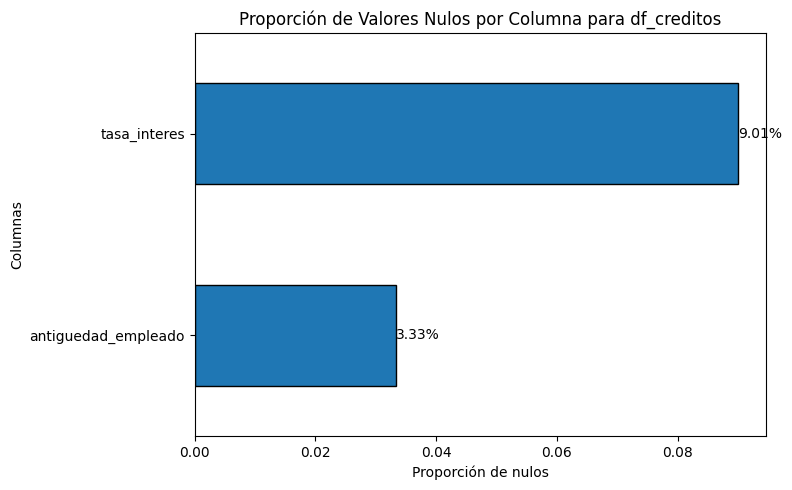

In [ ]:
# Proporción de valores nulos 
proporcion_nulos_creditos = df_creditos.isnull().mean()
proporcion_nulos_creditos = proporcion_nulos_creditos[proporcion_nulos_creditos >0]

plt.figure(figsize=(8, 5))
ax = proporcion_nulos_creditos.plot(kind='barh', edgecolor='black')
plt.title('Proporción de Valores Nulos por Columna para df_creditos')
plt.xlabel('Proporción de nulos')
plt.ylabel('Columnas')

for index, value in enumerate(proporcion_nulos_creditos):
    plt.text(value, index, f"{value:.2%}", va='center')
plt.tight_layout()
plt.show()

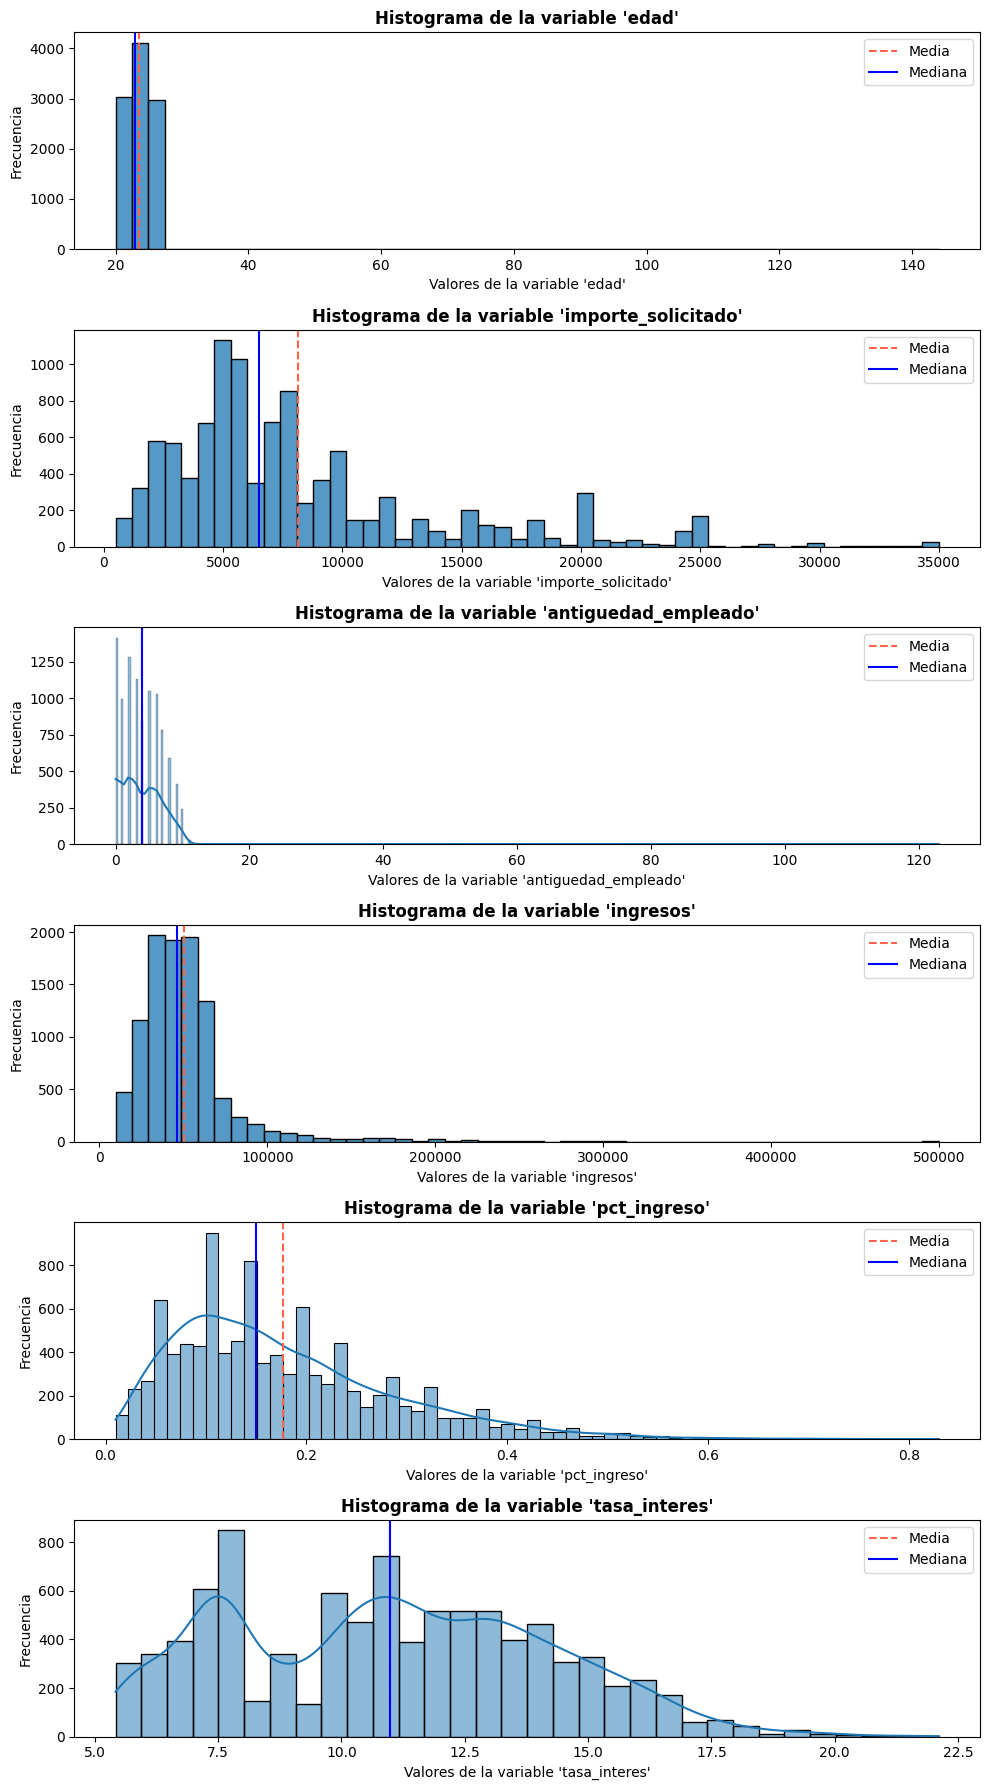

In [68]:
numericas_df_credito = df_creditos.drop(columns = ["id_cliente", "estado_credito", "duracion_credito"]).select_dtypes(include=['float64', 'int64']).columns
numero_columnass = len(numericas_df_credito)
plt.figure(figsize=(10, numero_columnass * 3))  

for index, col in enumerate(numericas_df_credito, start=1):
    plt.subplot(numero_columnass, 1, index)
    titulo = f"Histograma de la variable '{col}'"
    texto_ejex = f"Valores de la variable '{col}'"
    
    if df_creditos[col].dtype == 'float64':
        sns.histplot(df_creditos[col], kde=True)
    elif df_creditos[col].dtype == 'int64':
        sns.histplot(df_creditos[col], kde=False, bins=50)
        
    plt.axvline(df_creditos[col].mean(), color='tomato', linestyle='--', label='Media') # PAra media
    plt.axvline(df_creditos[col].median(), color='blue', linestyle='-', label='Mediana') # Para mediana
    plt.title(titulo, weight='bold')
    plt.xlabel(texto_ejex)
    plt.ylabel("Frecuencia")
    plt.legend()

plt.tight_layout()
plt.show()

In [71]:
# Potencialmente categoricas
df_creditos_aux = df_creditos.copy()

In [72]:
df_creditos_aux["estado_credito"] = df_creditos_aux["estado_credito"].astype(object)
df_creditos_aux["duracion_credito"] = df_creditos_aux["duracion_credito"].astype(object)

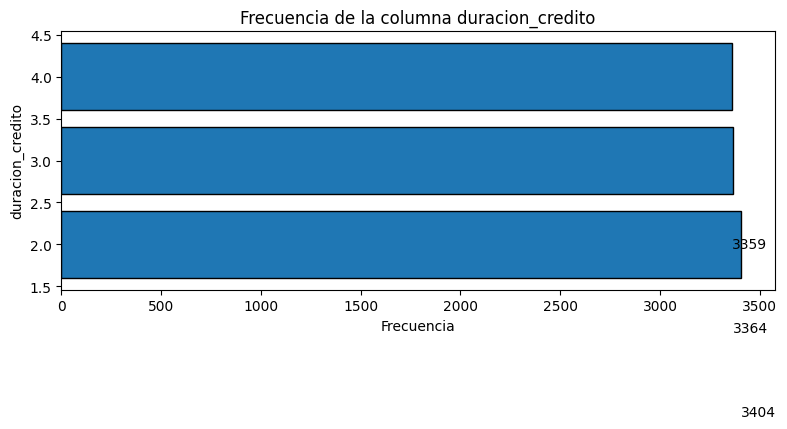

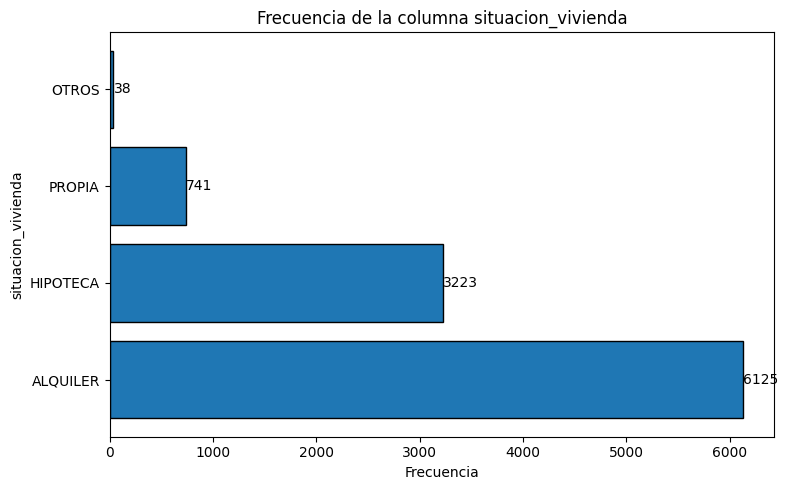

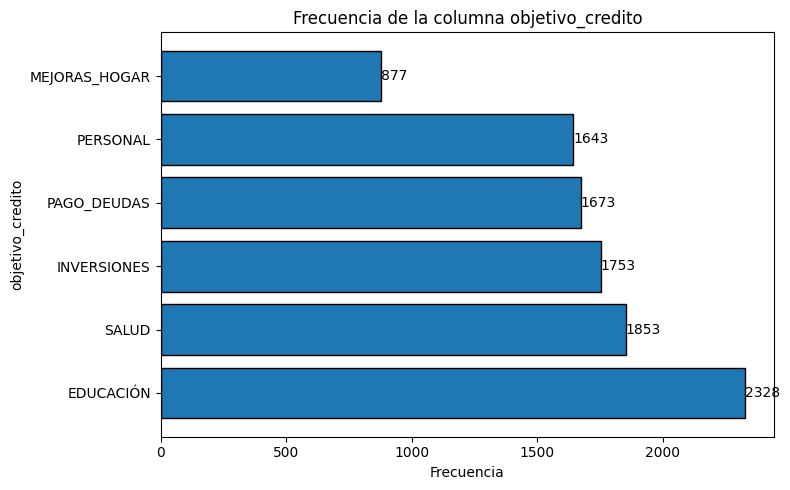

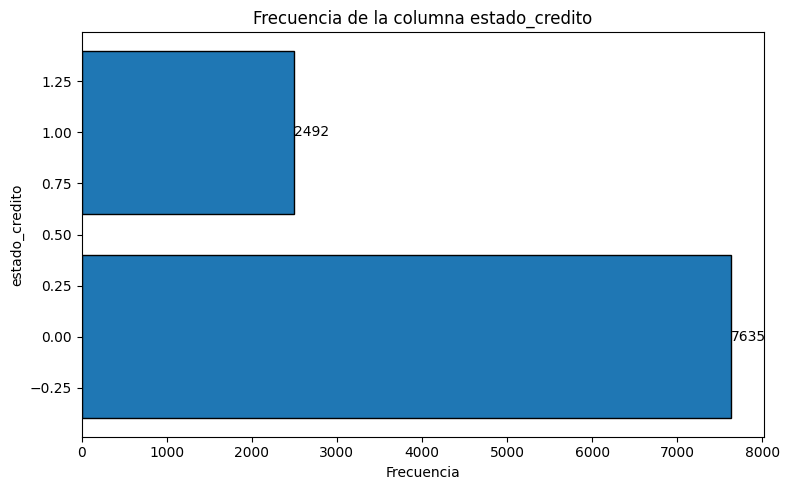

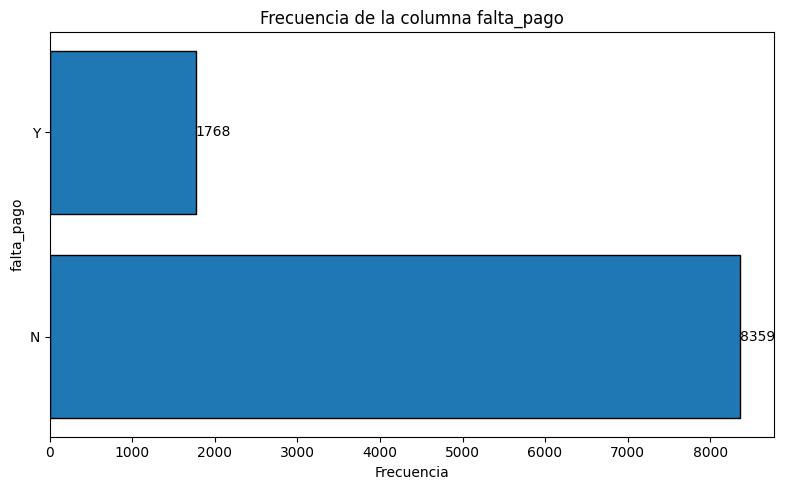

In [73]:
categoricas_creditos = df_creditos_aux.select_dtypes(include='object').columns.tolist()
for col in categoricas_creditos:
    plt.figure(figsize=(8, 5))
    aux_dict = df_creditos_aux[col].value_counts().to_dict()
    y = list(aux_dict.values())
    plt.barh(*zip(*aux_dict.items()), edgecolor='black')
    for index, value in enumerate(y):
        plt.text(value, index, str(value), va='center')
    plt.title(f'Frecuencia de la columna {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


##### Datos Tarjetas

In [ ]:
# Listado de columnas
list(df_tarjetas.columns)

['id_cliente',
 'antiguedad_cliente',
 'estado_civil',
 'estado_cliente',
 'gastos_ult_12m',
 'genero',
 'limite_credito_tc',
 'nivel_educativo',
 'nivel_tarjeta',
 'operaciones_ult_12m',
 'personas_a_cargo']

In [ ]:
# Descripción de los tipos de datos y valores no nulos
df_tarjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  float64
 1   antiguedad_cliente   10127 non-null  float64
 2   estado_civil         10127 non-null  object 
 3   estado_cliente       10127 non-null  object 
 4   gastos_ult_12m       10127 non-null  float64
 5   genero               10127 non-null  object 
 6   limite_credito_tc    10127 non-null  float64
 7   nivel_educativo      10127 non-null  object 
 8   nivel_tarjeta        10127 non-null  object 
 9   operaciones_ult_12m  10127 non-null  float64
 10  personas_a_cargo     10127 non-null  float64
dtypes: float64(6), object(5)
memory usage: 870.4+ KB


In [37]:
df_tarjetas.isna().sum()

id_cliente             0
antiguedad_cliente     0
estado_civil           0
estado_cliente         0
gastos_ult_12m         0
genero                 0
limite_credito_tc      0
nivel_educativo        0
nivel_tarjeta          0
operaciones_ult_12m    0
personas_a_cargo       0
dtype: int64

***No existen datos nulos para el dataframe de tarjetas***

In [ ]:
# Tabla de valores únicos, top categoría y frecuencia de variables categóricas
df_tarjetas.describe(include="object").T

,count,unique,top,freq
estado_civil,10127,4,CASADO,4687
estado_cliente,10127,2,ACTIVO,8500
genero,10127,2,F,5358
nivel_educativo,10127,6,UNIVERSITARIO_COMPLETO,3128
nivel_tarjeta,10127,4,Blue,9436


In [74]:
# Estadísticos descriptivo de variables numéricas
pd.options.display.float_format = '{:.3f}'.format
df_tarjetas.drop(columns = "id_cliente").describe().T

,count,mean,std,min,25%,50%,75%,max
antiguedad_cliente,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
gastos_ult_12m,10127.000,4404.086,3397.129,510.000,2155.500,3899.000,4741.000,18484.000
limite_credito_tc,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
operaciones_ult_12m,10127.000,64.859,23.473,10.000,45.000,67.000,81.000,139.000
personas_a_cargo,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000


In [77]:
df_tarjetas["personas_a_cargo"].value_counts()

personas_a_cargo
3.0    2732
2.0    2655
1.0    1838
4.0    1574
0.0     904
5.0     424
Name: count, dtype: int64

In [75]:
pd.reset_option('display.float_format')

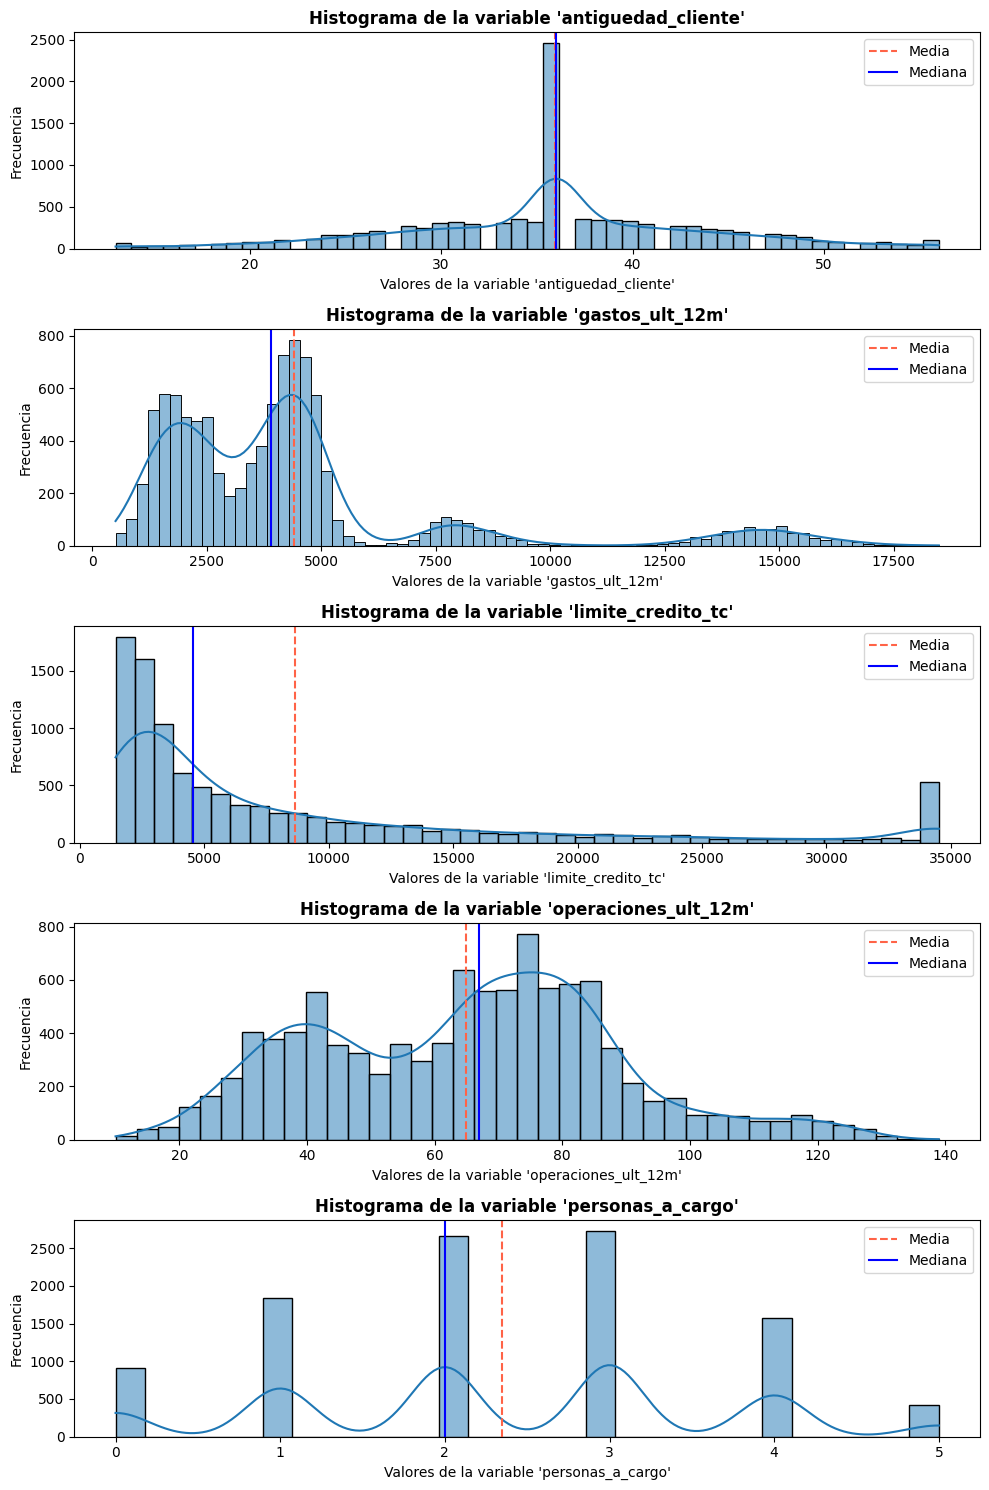

In [76]:
numericas_df_tarjetas = df_tarjetas.drop(columns = ["id_cliente"]).select_dtypes(include=['float64', 'int64']).columns
numero_columnas_tarjeta = len(numericas_df_tarjetas)
plt.figure(figsize=(10, numero_columnas_tarjeta * 3))  

for index, col in enumerate(numericas_df_tarjetas, start=1):
    plt.subplot(numero_columnas_tarjeta, 1, index)
    titulo = f"Histograma de la variable '{col}'"
    texto_ejex = f"Valores de la variable '{col}'"
    
    if df_tarjetas[col].dtype == 'float64':
        sns.histplot(df_tarjetas[col], kde=True)
    elif df_tarjetas[col].dtype == 'int64':
        sns.histplot(df_tarjetas[col], kde=False, bins=50)
        
    plt.axvline(df_tarjetas[col].mean(), color='tomato', linestyle='--', label='Media') # PAra media
    plt.axvline(df_tarjetas[col].median(), color='blue', linestyle='-', label='Mediana') # Para mediana
    plt.title(titulo, weight='bold')
    plt.xlabel(texto_ejex)
    plt.ylabel("Frecuencia")
    plt.legend()

plt.tight_layout()
plt.show()

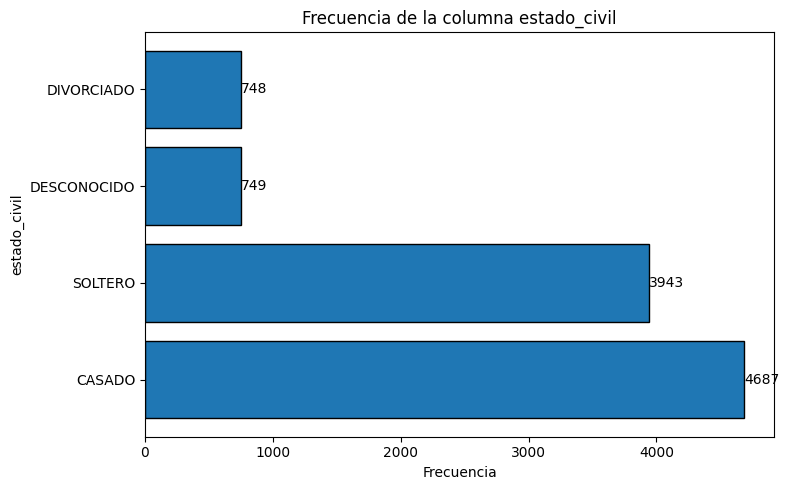

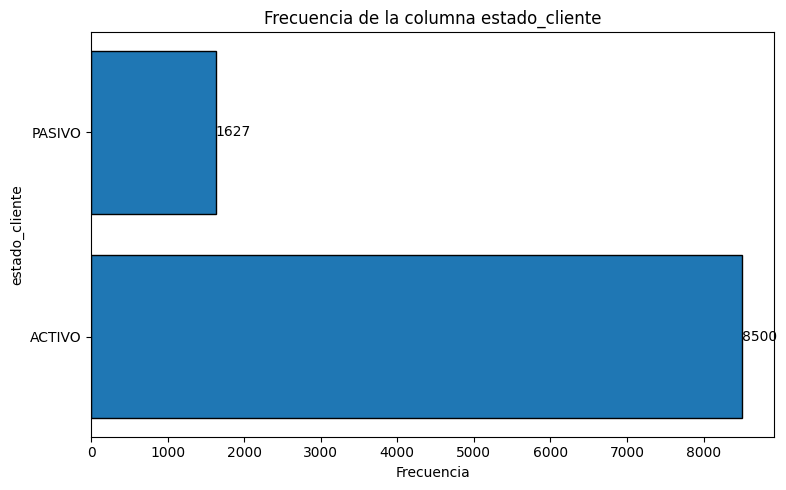

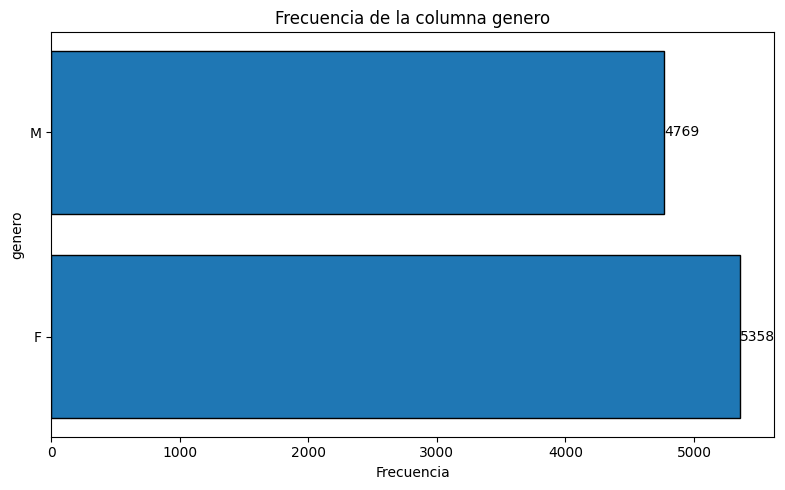

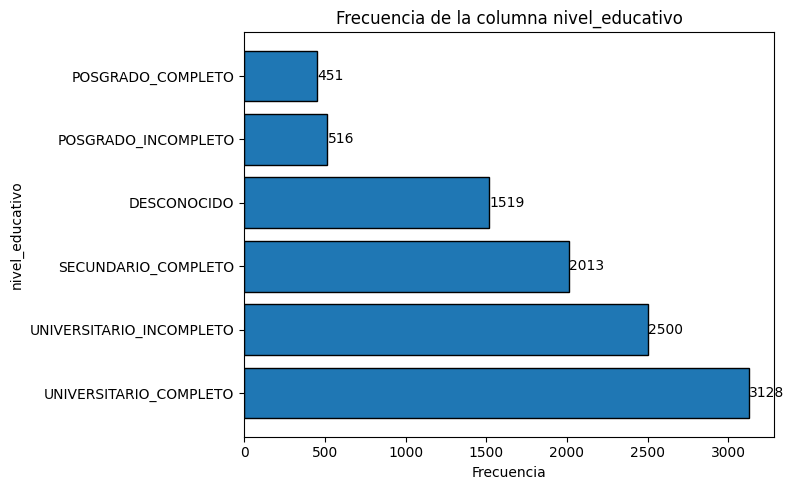

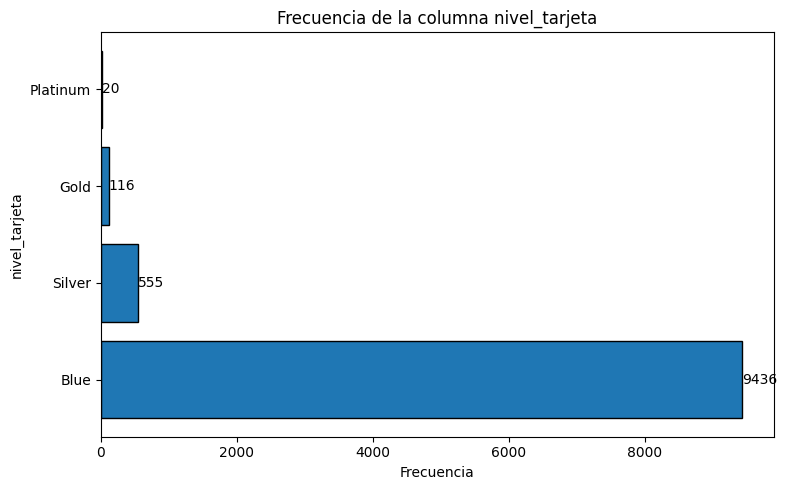

In [43]:
categoricas_tarjeta = df_tarjetas.select_dtypes(include='object').columns
for col in categoricas_tarjeta:
    plt.figure(figsize=(8, 5))
    aux_dict = df_tarjetas[col].value_counts().to_dict()
    y = list(aux_dict.values())
    plt.barh(*zip(*aux_dict.items()), edgecolor='black')
    for index, value in enumerate(y):
        plt.text(value, index, str(value), va='center')
    plt.title(f'Frecuencia de la columna {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

----

#### Verificación de la Calidad de los Datos